In [ ]:
#Replication Code for Taylor C. Boas and F. Daniel Hidalgo, 
#"Controlling the Airwaves: Incumbency Advantage and Community Radio in Brazil," 
#American Journal of Political Science

In [2]:
#install the following packages
library(car)
library(xtable)
library(Matching)
install.packages("reporttools")
library(reporttools)


The downloaded binary packages are in
	/var/folders/kj/pf6sd_jj5p77knqqx1whrz5m0000gp/T//RtmpVNdTFx/downloaded_packages


In [5]:
#Set working directory in the following line:
setwd("~/downloads")
load("/Users/recossio/Downloads/replication.RData")

In [24]:
##Replication of genetic matching##
##
#Table 3 (starting in line 223)
##
#1. Understanding the variables that were used in the Match function
str(match.data) #data used for matching
summary(genmatch.covar) #covariates that were matched on
summary(genmatch.output) #weights generated through genetic matching for the match
str(match.data$pctVV) #our Y for the first Match (match.pctVV) = percentage of valid votes (outcome)
str(match.data$elected)#our Y for the second Match (match.elected) = binary, elected or not (outcome)
str(match.data$treat) #our treatment: binary, whether the candidate has a community radio license


'data.frame':	1455 obs. of  40 variables:
 $ muni                : Factor w/ 1143 levels "","ABADIA DOS DOURADOS",..: 33 175 262 262 262 295 515 822 822 996 ...
 $ municode            : num  310 94 272 272 272 655 159 35 35 418 ...
 $ uf                  : Factor w/ 27 levels "","AC","AL","AM",..: 21 21 21 21 21 21 21 21 21 21 ...
 $ party               : Factor w/ 29 levels "DEM","PAN","PC do B",..: 22 26 24 13 6 9 24 11 9 24 ...
 $ male                : num  0 1 1 1 1 1 1 1 1 1 ...
 $ occ                 : chr  "Education" "White collar" "Education" "Government" ...
 $ edu                 : Factor w/ 3 levels "Less than Primary",..: 2 2 2 2 2 2 2 1 3 2 ...
 $ yob                 : num  1960 1962 1968 1968 1967 ...
 $ votes               : int  908 957 148 273 88 3 558 1025 270 227 ...
 $ elected             : num  0 0 0 0 0 0 1 0 0 0 ...
 $ valid.votes         : num  27892 35568 9260 28222 28222 ...
 $ coal.votes          : num  908 8297 2986 2510 1593 ...
 $ pctVV               : nu

 occBlue.collar     occEducation     occGovernment      occMedia      
 Min.   :0.00000   Min.   :0.00000   Min.   :0.000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.000   Median :0.00000  
 Mean   :0.09485   Mean   :0.08797   Mean   :0.132   Mean   :0.04948  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.000   Max.   :1.00000  
    occNone           occOther      occPolitician     occWhite.collar 
 Min.   :0.00000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :0.00000   Median :0.0000   Median :0.00000   Median :0.0000  
 Mean   :0.04536   Mean   :0.1643   Mean   :0.06254   Mean   :0.2729  
 3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:1.0000  
 Max.   :1.00000   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000  
      

              Length Class  Mode   
value           88   -none- numeric
par             44   -none- numeric
Weight.matrix 1936   -none- numeric
matches       1866   -none- numeric
ecaliper        44   -none- numeric

 num [1:1455] 6.13 2.69 1.6 2.72 0.88 ...
 num [1:1455] 0 0 0 0 0 0 1 0 0 0 ...
 num [1:1455] 1 0 0 0 0 1 1 0 0 0 ...
 num [1:1455] 0 0.693 0 0 0.693 ...


In [13]:
match.pctVV <- Match(Y= match.data$pctVV, Tr = match.data$treat, X = genmatch.covar, Weight.matrix=genmatch.output, BiasAdjust=FALSE, caliper = c(rep(10,43),.5))
summary(match.pctVV)

###NOTES ON THE FIRST MATCH FUNCTION OF THE PAPER
#statistically significant (p-value < 0.05)
#caliper: 10 for the first 43 covariates and .5 for the last one
#caliper definition:  A caliper is the distance which is acceptable for any match. 
#Observations which are outside of the caliper are dropped.  
#For example, caliper=.25 means that all matches not equal to or within .25 standard 
#deviations of each covariate in X are dropped.
#Why did they make the caliper so small for the last one?
str(genmatch.covar$log.num.apps) - #not sure what the variable is; it had the worst balance prior to matching
#either way no variable was dropped due to caliper



Estimate...  0.39213 
AI SE......  0.16692 
T-stat.....  2.3493 
p.val......  0.01881 

Original number of observations..............  1455 
Original number of treated obs...............  311 
Matched number of observations...............  311 
Matched number of observations  (unweighted).  311 

Caliper (SDs)........................................   10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 0.5 
Number of obs dropped by 'exact' or 'caliper'  0 



In [25]:
match.elected <- Match(Y= match.data$elected, Tr = match.data$treat, X = genmatch.covar, Weight.matrix=genmatch.output,  caliper = c(rep(10,43),.5), BiasAdjust=FALSE)
summary(match.elected)

###NOTES ON THE FIRST MATCH FUNCTION OF THE PAPER
#not statistically significant (p-value > 0.05)
#caliper: 10 for the first 43 covariates and .5 for the last one



Estimate...  0.067524 
AI SE......  0.038742 
T-stat.....  1.7429 
p.val......  0.081345 

Original number of observations..............  1455 
Original number of treated obs...............  311 
Matched number of observations...............  311 
Matched number of observations  (unweighted).  311 

Caliper (SDs)........................................   10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 0.5 
Number of obs dropped by 'exact' or 'caliper'  0 



In [ ]:
#for pctvv
balancepctvv <- MatchBalance(match.data$treat ~ occBlue.collar + occEducation + occGovernment + occMedia + occNone + occOther + occPolitician + occWhite.collar + lat + long + ran.prior + incumbent + log.valid.votes + party.prior.pctVV + prior.pctVV + elec.year + match.partyPCB + match.partyPC.do.B + match.partyPDT + match.partyPFL + match.partyPL + match.partyPMDB + match.partyPMN + match.partyPP + match.partyPPS + match.partyPSB + match.partyPSC + match.partyPSDB + match.partyPSDC + match.partyPSL + match.partyPT + match.partyPTB + match.partyPV + uf.rs + uf.sp + yob + eduMore.than.Primary..Less.than.Superior + eduSome.Superior.or.More + log.total.assets + pt_pres_1998 + psdb_2000 + hdi_2000 + income_2000 + log.num.apps, data=genmatch.covar, match.out = match.pctVV, nboots=1000)
#for elected or not elected
balanceelected <- MatchBalance(match.data$treat ~ occBlue.collar + occEducation + occGovernment + occMedia + occNone + occOther + occPolitician + occWhite.collar + lat + long + ran.prior + incumbent + log.valid.votes + party.prior.pctVV + prior.pctVV + elec.year + match.partyPCB + match.partyPC.do.B + match.partyPDT + match.partyPFL + match.partyPL + match.partyPMDB + match.partyPMN + match.partyPP + match.partyPPS + match.partyPSB + match.partyPSC + match.partyPSDB + match.partyPSDC + match.partyPSL + match.partyPT + match.partyPTB + match.partyPV + uf.rs + uf.sp + yob + eduMore.than.Primary..Less.than.Superior + eduSome.Superior.or.More + log.total.assets + pt_pres_1998 + psdb_2000 + hdi_2000 + income_2000 + log.num.apps, data=genmatch.covar, match.out = match.elected, nboots=1000)


Balance Measures
                                            Type Diff.Un Diff.Adj
occBlue.collar                            Binary -0.0307   0.0032
occEducation                              Binary -0.0056   0.0064
occGovernment                             Binary -0.0042   0.0161
occMedia                                  Binary  0.0475   0.0257
occNone                                   Binary -0.0127   0.0096
occOther                                  Binary  0.0037   0.0129
occPolitician                             Binary -0.0059   0.0032
occWhite.collar                           Binary  0.0456  -0.0161
lat                                      Contin. -0.0358  -0.0236
long                                     Contin. -0.0041  -0.0761
ran.prior                                 Binary -0.0085   0.0032
incumbent                                 Binary  0.0202   0.0096
log.valid.votes                          Contin. -0.1447   0.0931
party.prior.pctVV                        Contin.  0.0299   

Balance Measures
                                            Type Diff.Un Diff.Adj
occBlue.collar                            Binary -0.0307   0.0032
occEducation                              Binary -0.0056   0.0064
occGovernment                             Binary -0.0042   0.0161
occMedia                                  Binary  0.0475   0.0257
occNone                                   Binary -0.0127   0.0096
occOther                                  Binary  0.0037   0.0129
occPolitician                             Binary -0.0059   0.0032
occWhite.collar                           Binary  0.0456  -0.0161
lat                                      Contin. -0.0358  -0.0236
long                                     Contin. -0.0041  -0.0761
ran.prior                                 Binary -0.0085   0.0032
incumbent                                 Binary  0.0202   0.0096
log.valid.votes                          Contin. -0.1447   0.0931
party.prior.pctVV                        Contin.  0.0299   

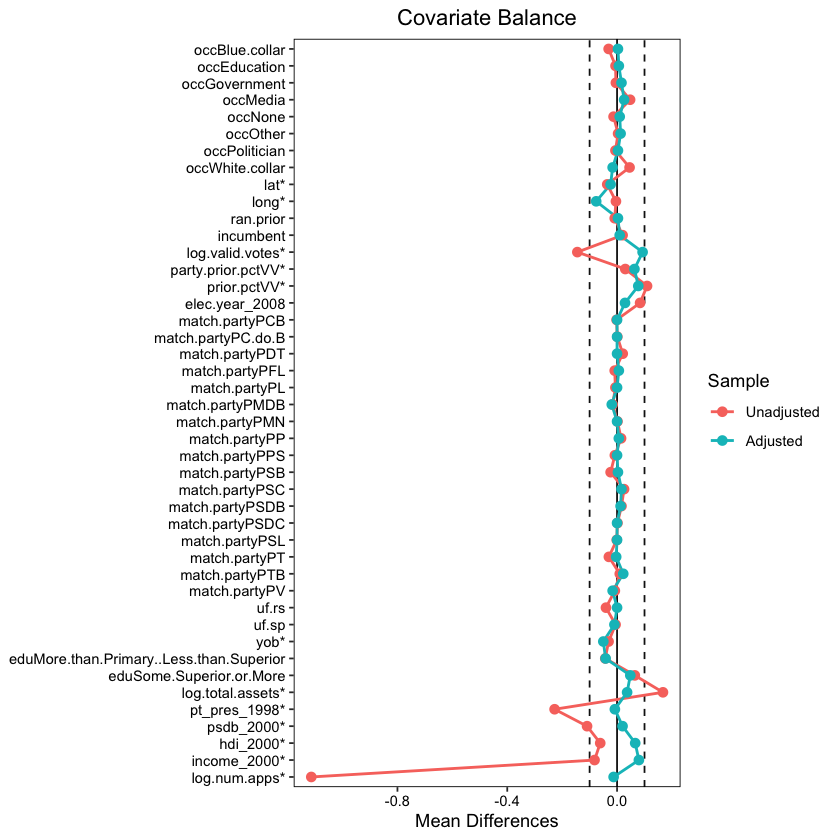

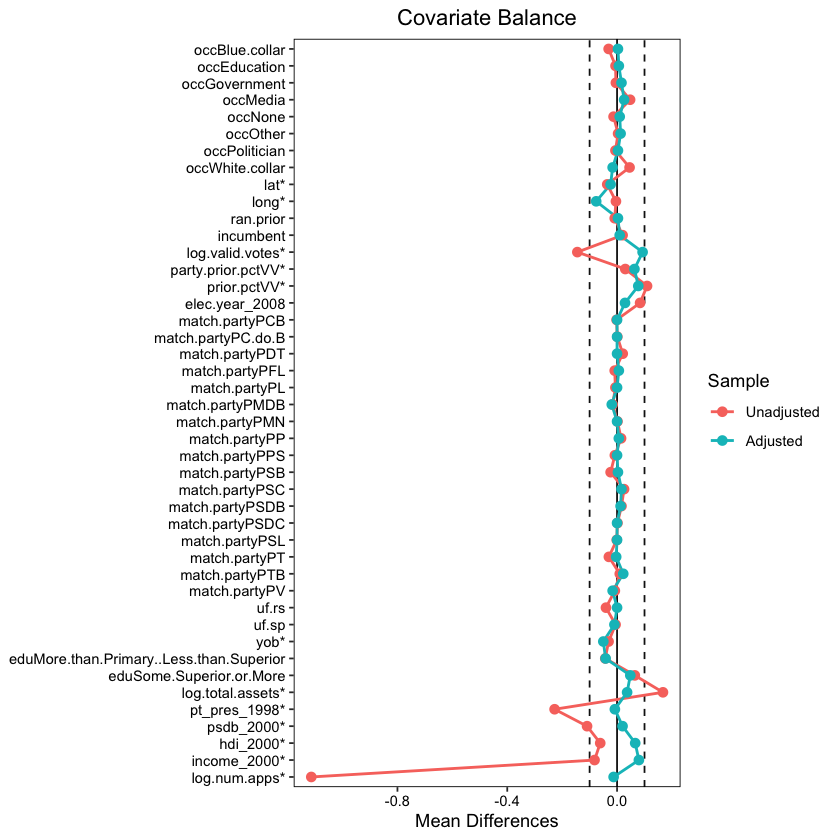

In [28]:
#a better display of balance
#install.packages("cobalt")
library(cobalt)
balance.table1 <- bal.tab(match.pctVV, match.data$treat ~ occBlue.collar + occEducation + occGovernment + occMedia + occNone + occOther + occPolitician + occWhite.collar + lat + long + ran.prior + incumbent + log.valid.votes + party.prior.pctVV + prior.pctVV + elec.year + match.partyPCB + match.partyPC.do.B + match.partyPDT + match.partyPFL + match.partyPL + match.partyPMDB + match.partyPMN + match.partyPP + match.partyPPS + match.partyPSB + match.partyPSC + match.partyPSDB + match.partyPSDC + match.partyPSL + match.partyPT + match.partyPTB + match.partyPV + uf.rs + uf.sp + yob + eduMore.than.Primary..Less.than.Superior + eduSome.Superior.or.More + log.total.assets + pt_pres_1998 + psdb_2000 + hdi_2000 + income_2000 + log.num.apps, data=genmatch.covar, un=TRUE, quick=FALSE)
balance.table1
love.plot(balance.table1, 
          threshold =.1,
          line = TRUE,
          stars = "std") #variables have been standardized

balance.table2 <- bal.tab(match.elected, match.data$treat ~ occBlue.collar + occEducation + occGovernment + occMedia + occNone + occOther + occPolitician + occWhite.collar + lat + long + ran.prior + incumbent + log.valid.votes + party.prior.pctVV + prior.pctVV + elec.year + match.partyPCB + match.partyPC.do.B + match.partyPDT + match.partyPFL + match.partyPL + match.partyPMDB + match.partyPMN + match.partyPP + match.partyPPS + match.partyPSB + match.partyPSC + match.partyPSDB + match.partyPSDC + match.partyPSL + match.partyPT + match.partyPTB + match.partyPV + uf.rs + uf.sp + yob + eduMore.than.Primary..Less.than.Superior + eduSome.Superior.or.More + log.total.assets + pt_pres_1998 + psdb_2000 + hdi_2000 + income_2000 + log.num.apps, data=genmatch.covar, un=TRUE, quick=FALSE)
balance.table2
love.plot(balance.table2, 
          threshold =.1,
          line = TRUE,
          stars = "std") #variables have been standardized


In [ ]:
# POSSIBLE SUGGESTIONS FOR REPLICATION
# Match exactly on a specific variable for pctvv (percent of valid votes)
# Match exactly on a specific variable for elected
# Change the caliper
# Apply sensitivity analysis
# Do matching for the group of candidates who got their license less than 45 days prior to the election
# Find data for the 2016/20 elections to see if there is a difference given advances in communications since 2008


In [21]:
#Replicating the code with no changes
match.pctVV <- Match(Y= match.data$pctVV, Tr = match.data$treat, X = genmatch.covar, Weight.matrix=genmatch.output, BiasAdjust=FALSE, caliper = c(rep(10,43),.5))
match.elected <- Match(Y= match.data$elected, Tr = match.data$treat, X = genmatch.covar, Weight.matrix=genmatch.output,  caliper = c(rep(10,43),.5), BiasAdjust=FALSE)
bal.data <- with(match.data, data.frame(match.party, male, occ, edu, yob, lat, long, ran.prior, incumbent, log.valid.votes, prior.pctVV, party.prior.pctVV, elec.year, log.total.assets, gini_2000, pt_pres_1998, income_2000, psdb_2000, pt_2000, hdi_2000, uf.ba, uf.sp, uf.mg, uf.rs, log.num.apps))
bal.fmla <- as.formula(paste("treat~",paste(names(bal.data),collapse="+")))
match.bal <- MatchBalance(bal.fmla, data = data.frame(treat = match.data$treat, bal.data), match.out = match.pctVV,nboots=3000)
before.sd.diff <- sapply(match.bal$BeforeMatching, function(x) x[[1]])
after.sd.diff <- sapply(match.bal$AfterMatching, function(x) x[[1]])
before.t.p <- matrix(sapply(match.bal$BeforeMatching, function(x) x$tt[3]))
after.t.p <- matrix(sapply(match.bal$AfterMatching, function(x) x$tt[3]))
before.ks.p <- matrix(sapply(match.bal$BeforeMatching, function(x) x$ks$ks.boot.pvalue))
after.ks.p <- matrix(sapply(match.bal$AfterMatching, function(x) x$ks$ks.boot.pvalue))
bal.stats <- data.frame(var = names(data.frame(model.matrix(as.formula(paste("~",paste(names(bal.data),collapse="+"))), bal.data)[,-1])), before.sd.diff, after.sd.diff, before.t.p = unlist(before.t.p), after.t.p = unlist(after.t.p), before.ks.p, after.ks.p)
bal.stats <- bal.stats[c(4,6,12,15,18:27,29:49),]
rownames(bal.stats)  <- c("Party: PFL", "Party: PMDB", "Party: PSDB", "Party: PT", "Male", "Occupation: Blue Collar", "Occupation: Education", "Occupation: Government", "Occupation: Media", "Occupation: None", "Occupation: Other", "Occupation: Politician", "Occupation: White Collar", "Education: Some Superior or More", "Year of Birth", "Latitude", "Longitude", "Ran Previously", "Incumbency", "Log Electorate", "Prior Vote Share", "Party Prior Vote Share", "Election Year", "Total Assets", "2000 Gini", "PT Pres Vote Share (1998)", "GDP Per Capita (2000)", "PSDB Mayor Vote Share (2000)", "PT Mayor Vote Share (2000)", "HDI (2000)", "State: Bahia", "State: Sao Paulo", "State: Minas Gerais", "State: Rio Grande do Sul", "Log Number of Applications")
bal.stats$before.ks.p[bal.stats$before.ks.p=="NULL"] <- NA
bal.stats$after.ks.p[bal.stats$after.ks.p=="NULL"] <- NA
bal.stats$before.ks.p <- unlist(bal.stats$before.ks.p)
bal.stats$after.ks.p <- unlist(bal.stats$after.ks.p)
bal.stats <- bal.stats[order(abs(bal.stats$before.sd.diff), decreasing = TRUE),]
bal.stats <- bal.stats[,-1]
bal.check.table <- xtable(bal.stats, display=c("s",rep("fg",6)), caption = "Balance Statistics")
digits(bal.check.table) <-2
align(bal.check.table) <- "r|rrrrrr"
print(bal.check.table,latex.environment = "center", include.rownames = TRUE,hline.after=c(0,nrow(bal.check.table)),floating.environment = "sidewaystable")


***** (V1) match.partyPC do B *****
                       Before Matching 	 	 After Matching
mean treatment........   0.019293 	 	   0.019293 
mean control..........   0.018357 	 	   0.019293 
std mean diff.........    0.67935 	 	          0 

mean raw eQQ diff.....          0 	 	          0 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          0 

mean eCDF diff........ 0.00046798 	 	          0 
med  eCDF diff........ 0.00046798 	 	          0 
max  eCDF diff........ 0.00093596 	 	          0 

var ratio (Tr/Co).....     1.0525 	 	          1 
T-test p-value........    0.91499 	 	          1 


***** (V2) match.partyPCB *****
                       Before Matching 	 	 After Matching
mean treatment........          0 	 	          0 
mean control..........  0.0017483 	 	          0 
std mean diff.........       -Inf 	 	          0 

mean raw eQQ diff.....  0.0032154 	 	          0 
med  raw eQQ diff.....          0 	 	          0 
max  raw 

% latex table generated in R 4.1.0 by xtable 1.8-4 package
% Mon Dec  5 13:57:25 2022
\begin{sidewaystable}[ht]
\centering
\begin{tabular}{r|rrrrrr}
  & before.sd.diff & after.sd.diff & before.t.p & after.t.p & before.ks.p & after.ks.p \\ 
  \hline
Log Number of Applications & -111 & -1.3 & 0 & 0.13 & 0 & 0.92 \\ 
  State: Rio Grande do Sul & -27 & 0 & 0.00028 &   1 &  &  \\ 
  PT Pres Vote Share (1998) & -23 & -0.8 & 0.00078 & 0.9 & 0.0023 & 0.45 \\ 
  Election Year &  17 &   6 & 0.0073 & 0.21 &  &  \\ 
  Occupation: Media &  17 & 9.1 & 0.0055 & 0.19 &  &  \\ 
  Total Assets &  17 & 3.7 & 0.0087 & 0.46 & 0.0063 & 0.082 \\ 
  Male &  16 & 6.1 & 0.017 & 0.48 &  &  \\ 
  Log Electorate & -14 & 9.3 & 0.029 & 0.11 & 0.0063 & 0.79 \\ 
  PT Mayor Vote Share (2000) & -12 & -0.74 & 0.06 & 0.92 & 0.11 & 0.78 \\ 
  Occupation: Blue Collar & -12 & 1.3 & 0.073 & 0.71 &  &  \\ 
  PSDB Mayor Vote Share (2000) & -11 &   2 & 0.09 & 0.72 & 0.096 & 0.54 \\ 
  Prior Vote Share &  11 & 7.7 & 0.079 & 0.11 